# Visualizations of Finances CSV

The purpose of this notebook is to visualize the data found in finances.csv, which was produced from the CSV - DF Creation Notebook

<figure>
    <img src="Finance Illustration.png"
         alt="Let's chart the data"
         width="400"
         height="200">
    <figcaption><center><bold>Let's chart the data!</figcaption>
</figure>

## Import and Overall Analysis

After looking at the financial data as seen in [insert final jupyter notebook here], we decided to stratify the budget data in order to generate statistics on films in each budget category

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import string
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'

Reading in the CSV file from the previous notebook, mapping certain columns to appropriate data types, and dropping columns that are not needed for the relationship analysis between production budget and box office sales

In [2]:
df = pd.read_csv("financial_data.csv")
df['production_budget'] = df['production_budget'].map(int)
df['domestic_gross'] = df['domestic_gross'].map(int)
df['worldwide_gross'] = df['worldwide_gross'].map(int)
df['profit'] = df['profit'].map(int)
df['profit_margin'] = df['profit_margin'].map(int)
df = df.drop(['Unnamed: 0', 'id', 'endYear', 'titleType', 'originalTitle', 'runtimeMinutes', 'year_y', 'primaryTitle', 'isAdult'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       1179 non-null   object
 1   movie              1179 non-null   object
 2   production_budget  1179 non-null   int64 
 3   domestic_gross     1179 non-null   int64 
 4   worldwide_gross    1179 non-null   int64 
 5   year_x             1179 non-null   int64 
 6   profit             1179 non-null   int64 
 7   profit_margin      1179 non-null   int64 
 8   movie_and_year     1179 non-null   object
 9   tconst             1179 non-null   object
 10  startYear          1179 non-null   object
 11  genres             1179 non-null   object
dtypes: int64(6), object(6)
memory usage: 110.7+ KB


Let's do a back of the napkin check to see if there is an immediate relationship between production budget and box office sales:

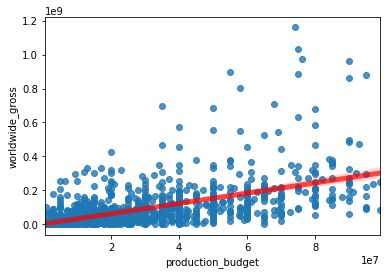

In [3]:
sns.regplot(x=df["production_budget"], y=df["worldwide_gross"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

It appears there is a relatively weak positive correlation between production_budget and worldwide gross sales. This makes sense, because the more spent on a movie the more you are likely to get in return. However, the more interesting metric for our business case is profit margin.

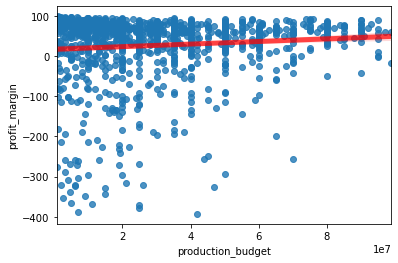

In [14]:
df_exclude_outliers = df[df['profit_margin'] > -400]

sns.regplot(x=df_exclude_outliers["production_budget"], y=df_exclude_outliers["profit_margin"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Things get more complicated when we look at the relationship between profit margin and production budget. Once you exclude the 78 outliers (more on those later), it appears there is a very weak positive to no correlation between production_budget and profit margin. Perhaps if we stratefied the data, we can get more insight as to which amount of spend most positively correlates to high profit margins.

## Stratificiation of Production Budget

The following code assigns classifications to each production budget amount for purposes of further analysis:

In [23]:
budget_tier = []
for row in df['production_budget']:
    if row < 20000000 :    budget_tier.append('very-low budget')
    elif row < 40000000:   budget_tier.append('low budget')
    elif row < 60000000:  budget_tier.append('middle budget')
    elif row < 80000000:  budget_tier.append('high budget')
    elif row < 100000000:  budget_tier.append('super-high budget')
    else:           budget_tier.append('Not_Rated')

df['budget_tier'] = budget_tier

Overview of counts associated with each budget category:

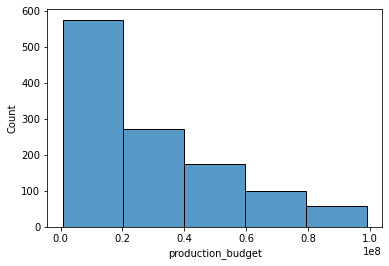

In [24]:
sns.histplot(data=df, x="production_budget", bins=5)
plt.show()

This distribution makes sense, because it is likely much easier to secure funding for lower production projects than it is for higher production projects.

Let's get a gut check of each of the categories

In [31]:
df_tiers = df[['budget_tier','profit_margin']]
df_tiers.groupby(['budget_tier']).describe()

profit_margin                                           \
                          count        mean          std      min    25%   
budget_tier                                                                
high budget               100.0  -85.480000  1254.154917 -12490.0  21.00   
low budget                338.0 -496.440828  4563.263921 -64836.0  -3.75   
middle budget             176.0 -370.863636  4614.623343 -60953.0   7.75   
super-high budget          57.0   53.631579    30.391864    -49.0  43.00   
very-low budget           508.0 -307.549213  1588.503280 -18856.0 -37.00   

                                      
                    50%    75%   max  
budget_tier                           
high budget        56.0  70.25  93.0  
low budget         50.0  71.00  95.0  
middle budget      51.0  73.00  93.0  
super-high budget  61.0  75.00  90.0  
very-low budget    57.0  82.00  99.0

The maximums of profit margin make sense, however, the minimums are far below expectations. There are likely some outliers (total 'flops' at the box office) that we will need to consider before doing meaningful analysis of each strata.

Breaking the master dataframe into their own data frames:

In [32]:
df_vhb = df[df['budget_tier'] == 'super-high budget']
df_hb = df[df['budget_tier'] == 'high budget']
df_mb = df[df['budget_tier'] == 'middle budget']
df_lb = df[df['budget_tier'] == 'low budget']
df_vlb = df[df['budget_tier'] == 'very-low budget']

### *Tier Analysis: Super-High Budget*

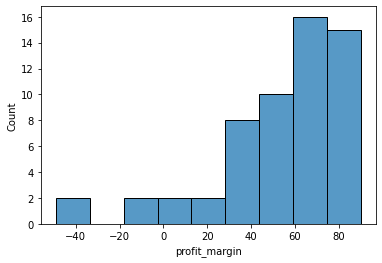

In [33]:
sns.histplot(data=df_vhb, x="profit_margin")
plt.show()

Not a very insteresting distribution with no major outliers. However, this data set is the smallest of the strata so it makes sense that there would not be a lot of opportunity for outliers to emerge

In [52]:
print(f"The mean profit margin of the very high budget strata is {df_vhb['profit_margin'].mean()}")
print(f"The median profit margin of the very high budget strata is {df_vhb['profit_margin'].median()}")
print(f"The correlation between profit margin and production budget of the very high budget strata is {df_vhb['production_budget'].corr(df_vhb['profit_margin'])}")

The mean profit margin of the very high budget strata is 53.63157894736842
The median profit margin of the very high budget strata is 61.0
The correlation between profit margin and production budget of the very high budget strata is -0.14159907297978813


In [ ]:
df_hb = df_hb.drop([118])

In [ ]:
sns.histplot(data=df_hb, x="profit_margin")
plt.show()

In [ ]:
sns.histplot(data=df_mb, x="profit_margin")
plt.show()

In [ ]:
df_mb_outliers = df_mb[df_mb['profit_margin'] < -1000]

In [ ]:
df_mb = df_mb.drop([259, 331, 332])

In [ ]:
sns.histplot(data=df_mb, x="profit_margin")
plt.show()

In [ ]:
sns.histplot(data=df_lb, x="profit_margin")
plt.show()

In [ ]:
df_lb_outliers = df_lb[df_lb['profit_margin'] < -1000]

In [ ]:
df_lb_outliers.index

In [ ]:
df_lb = df_lb.drop([404, 405, 414, 478, 518, 560, 603, 665, 666, 669, 670])

In [ ]:
sns.histplot(data=df_lb, x="profit_margin")
plt.show()

In [ ]:
genre_list = list(df['genres'])

list_of_genres = []

for genre in genre_list:
    to_add = genre.split(',')
    list_of_genres.append(to_add)

unique_genres = {}

for genre_list in list_of_genres:
    for genre in genre_list:
        if genre not in unique_genres:
            unique_genres[genre] = 1
        else:
            unique_genres[genre] += 1

In [ ]:
sort_genres = sorted(unique_genres.items(), key=lambda x:x[1], reverse=True)

In [ ]:
sort_genres

In [ ]:
df['genres'].value_counts().head(50)

In [ ]:
pd.set_option('display.max_rows', 10)